In [1]:
#--1--
#  (Data Preparation · Uploading the data) ---

# ספריות עבודה בסיסיות לעיבוד וסקירה ראשונית של נתונים
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #ליצירת גרפים
import seaborn as sns
import warnings

from IPython.display import display  # ספריה שמציגה טבלאות בצורה יפה


# הפחתת הודעות אזהרה לא מהותיות לשמירה על פלט נקי
warnings.filterwarnings("ignore")

# קריאת קובץ הדאטה הראשי
df = pd.read_csv(r"C:\Users\user\Desktop\BIU דאטה סיינס\ML\פרויקט 2\פרויקט 2 - סופי\TMDB_tv_dataset_v3.csv")



In [2]:
#--2--

# אימות טעינה ומבנה בסיסי של הדאטה: סוגי עמודות, כמות ערכים לא־חסרים, וסה״כ שורות/עמודות
df.info()

# דגימה חזותית מהירה של הרשומות הראשונות לאימות שמות עמודות ותכולה
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    168639 non-null  int64  
 1   name                  168634 non-null  object 
 2   number_of_seasons     168639 non-null  int64  
 3   number_of_episodes    168639 non-null  int64  
 4   original_language     168639 non-null  object 
 5   vote_count            168639 non-null  int64  
 6   vote_average          168639 non-null  float64
 7   overview              93333 non-null   object 
 8   adult                 168639 non-null  bool   
 9   backdrop_path         77780 non-null   object 
 10  first_air_date        136903 non-null  object 
 11  last_air_date         138735 non-null  object 
 12  homepage              50998 non-null   object 
 13  in_production         168639 non-null  bool   
 14  original_name         168634 non-null  object 
 15  

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45


In [3]:
#--3--

# וידוא סוגי נתונים נכונים והמרות 

# סקירת טיפוסים קיימים – לאיתור עמודות שדורשות טיפול
df.dtypes  # פלט באנגלית: שם עמודה -> dtype

# 2.1 עמודות טקסט/קטגוריה: המרה ל-StringDtype (סטנדרטי, עקבי, ידידותי לעיבוד טקסט)
# הערה: לא ממירים כאן באופן עיוור – רק עמודות מסוג object שאינן תאריכים/מספרים.
text_like_cols = df.select_dtypes(include=["object"]).columns

# סינון אופציונלי: אם ידועות עמודות מסוימות שלא נרצה להפוך ל-string, אפשר להחריג כאן.
# לדוגמה:
# text_like_cols = [c for c in text_like_cols if c not in ["some_numeric_as_text"]]

for col in text_like_cols:
    df[col] = df[col].astype("string")  # המרה מפורשת ל-string (ולא השארת object כללי)

# 2.2 המרת תאריכים (אם קיימים) – יש לבחור במפורש את שמות העמודות הרלוונטיים
# הערה: המרה זהירה; אין לנחש שמות. הוסיפי/הסריי עמודות ידועות בלבד.
date_cols = [
    # דוגמה: "release_date", "first_air_date"
]
if date_cols:
    df[date_cols] = df[date_cols].apply(pd.to_datetime, errors="coerce")  # המרה בטוחה: ערכים לא תקינים -> NaT

# 2.3 המרת עמודות מספריות שמופיעות כטקסט (אם יש) – רשימה מפורשת בלבד
numeric_as_text_cols = [
    # דוגמה: "vote_count", "season_number", "episode_run_time"
]
for col in numeric_as_text_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # המרה מספרית; ערכים לא תקינים -> NaN

# בדיקת תוצאה אחרי ההמרות
df.dtypes


id                               int64
name                    string[python]
number_of_seasons                int64
number_of_episodes               int64
original_language       string[python]
vote_count                       int64
vote_average                   float64
overview                string[python]
adult                             bool
backdrop_path           string[python]
first_air_date          string[python]
last_air_date           string[python]
homepage                string[python]
in_production                     bool
original_name           string[python]
popularity                     float64
poster_path             string[python]
type                    string[python]
status                  string[python]
tagline                 string[python]
genres                  string[python]
created_by              string[python]
languages               string[python]
networks                string[python]
origin_country          string[python]
spoken_languages        s

In [4]:
#--4--

# -- Data types: text-like -> string, dates -> datetime --

# עמודות טקסט/קטגוריה: המרה מפורשת ל-string לאחידות טיפול
text_like_cols = [
    "original_language", "type", "status", "genres", "languages",
    "origin_country", "spoken_languages", "production_companies", "production_countries"
]
for col in text_like_cols:
    if col in df.columns:
        df[col] = df[col].astype("string")  # המרה מפורשת ל-string

# עמודות תאריך: המרה בטוחה ל-datetime (ערכים לא תקינים -> NaT)
date_cols = ["first_air_date", "last_air_date"]
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

# אימות תוצאה: יציג רק את העמודות ששינינו כדי לראות שהטיפוסים נכונים
print(df[text_like_cols + date_cols].dtypes)


original_language       string[python]
type                    string[python]
status                  string[python]
genres                  string[python]
languages               string[python]
origin_country          string[python]
spoken_languages        string[python]
production_companies    string[python]
production_countries    string[python]
first_air_date          datetime64[ns]
last_air_date           datetime64[ns]
dtype: object


In [5]:
#--5--

# סיכום ייחודיות בעמודות קטגוריות

# שליפה של כל עמודות טקסט/קטגוריות
cat_cols = df.select_dtypes(include=["string", "category"]).columns

# חישוב מספר הערכים הייחודיים בכל עמודה
unique_counts = df[cat_cols].nunique().sort_values(ascending=False)

# סף לקביעת "עמודות עם הרבה קטגוריות"
threshold = 20

print("=== Categorical Columns — Full Summary ===")
print(unique_counts.to_string())  # מציג את כל הרשימה

print("\n=== Columns with MANY unique values (>)", threshold, "===")
print(unique_counts[unique_counts > threshold].to_string())

print("\n=== Columns with FEW unique values (≤)", threshold, "===")
print(unique_counts[unique_counts <= threshold].to_string())



=== Categorical Columns — Full Summary ===
original_name           157313
name                    155586
poster_path             106050
overview                 91243
backdrop_path            76300
homepage                 49758
production_companies     27132
created_by               26081
networks                  8196
tagline                   5267
genres                    2228
production_countries      1247
languages                 1113
spoken_languages           946
origin_country             792
original_language          106
type                         7
status                       6

=== Columns with MANY unique values (>) 20 ===
original_name           157313
name                    155586
poster_path             106050
overview                 91243
backdrop_path            76300
homepage                 49758
production_companies     27132
created_by               26081
networks                  8196
tagline                   5267
genres                    2228
production


=== Frequency distribution for 'original_language' ===


,count,percent
original_language,,
en,76304,45.25
zh,14422,8.55
ja,14048,8.33
ko,7820,4.64
de,7712,4.57
fr,7290,4.32
es,5602,3.32
pt,3551,2.11
ru,2963,1.76


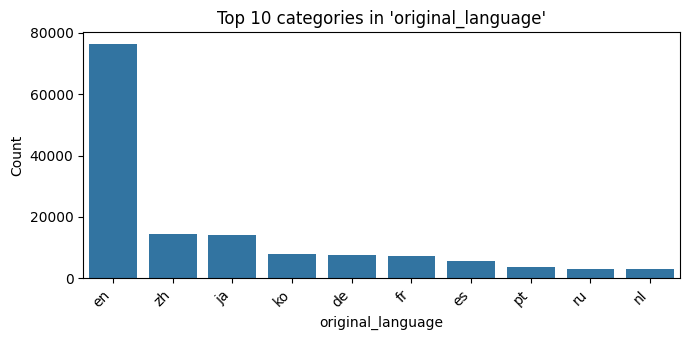


=== Frequency distribution for 'type' ===


,count,percent
type,,
Scripted,129301,76.67
Documentary,13864,8.22
Miniseries,10810,6.41
Reality,9682,5.74
Talk Show,2997,1.78
Video,1379,0.82
News,606,0.36


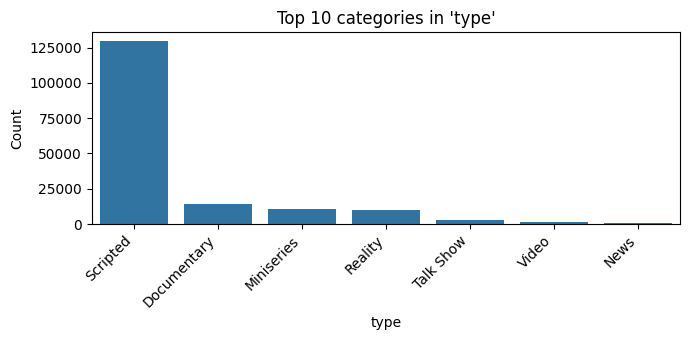


=== Frequency distribution for 'status' ===


,count,percent
status,,
Ended,93232,55.28
Returning Series,67507,40.03
Canceled,4634,2.75
In Production,2380,1.41
Planned,650,0.39
Pilot,236,0.14


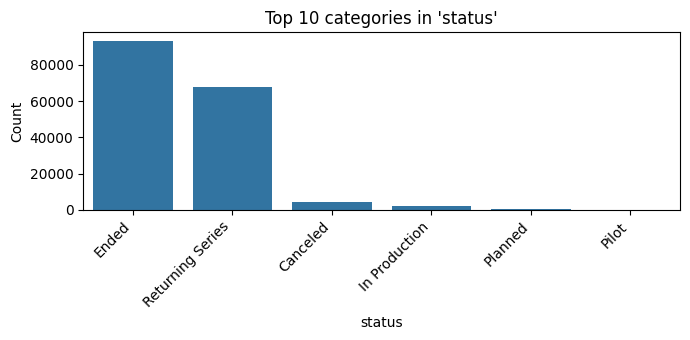


=== Frequency distribution for 'genres' ===


,count,percent
genres,,
<NA>,68926,40.87
Documentary,17596,10.43
Drama,16282,9.65
Comedy,10304,6.11
Reality,8009,4.75
Animation,3326,1.97
"Comedy, Drama",1932,1.15
"Drama, Comedy",1878,1.11
Talk,1872,1.11


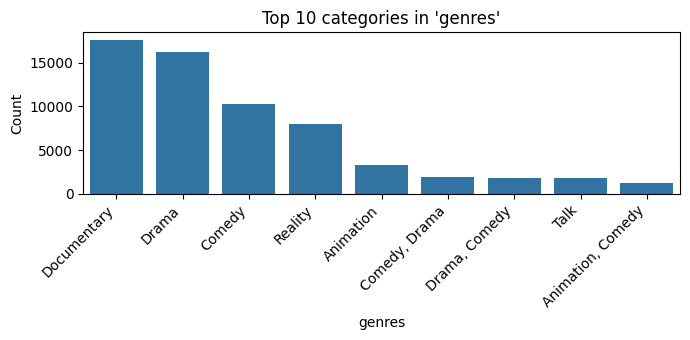


=== Frequency distribution for 'languages' ===


,count,percent
languages,,
<NA>,58589,34.74
en,38671,22.93
ja,11051,6.55
zh,7883,4.67
de,6204,3.68
fr,5745,3.41
ko,4520,2.68
es,3853,2.28
pt,2789,1.65


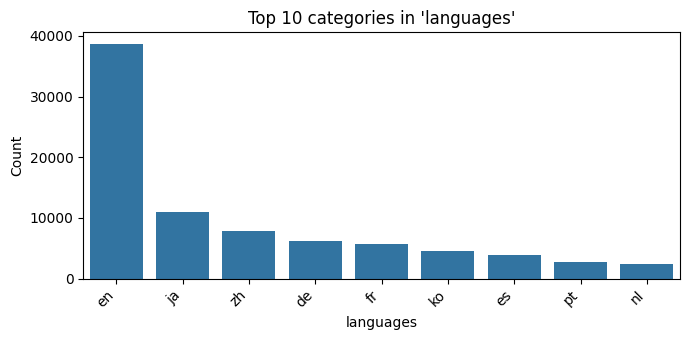


=== Frequency distribution for 'origin_country' ===


,count,percent
origin_country,,
<NA>,31030,18.4
US,28759,17.05
JP,13658,8.1
GB,13298,7.89
CN,11651,6.91
DE,6607,3.92
KR,6146,3.64
CA,4528,2.69
FR,4015,2.38


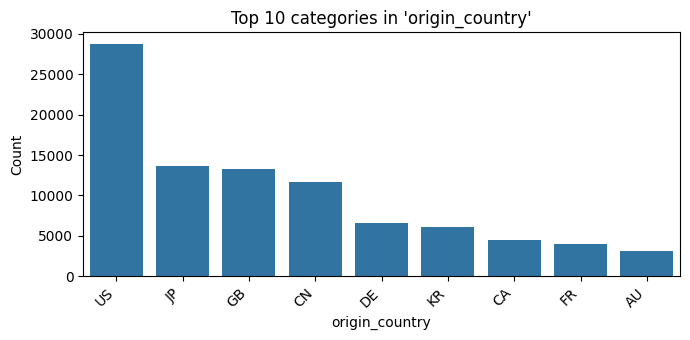


=== Frequency distribution for 'spoken_languages' ===


,count,percent
spoken_languages,,
<NA>,59359,35.2
English,39251,23.28
日本語,11053,6.55
普通话,7892,4.68
Deutsch,6209,3.68
Français,5750,3.41
한국어/조선말,4522,2.68
Español,3861,2.29
Português,2794,1.66


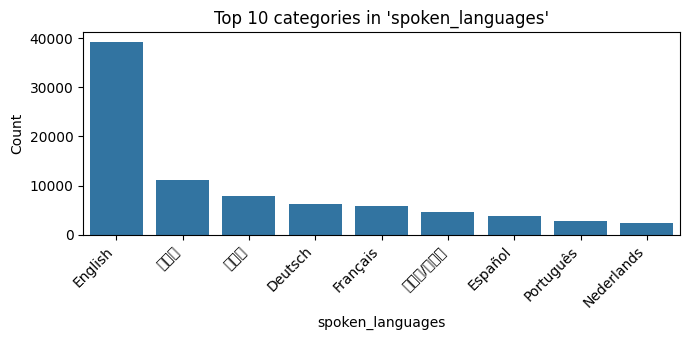


=== Frequency distribution for 'production_companies' ===


,count,percent
production_companies,,
<NA>,109297,64.81
TVB,1356,0.8
BBC,546,0.32
Estúdios Globo,534,0.32
NHK,465,0.28
DR TV,324,0.19
TV 2,300,0.18
Televisa,299,0.18
GMA Entertainment Group,278,0.16


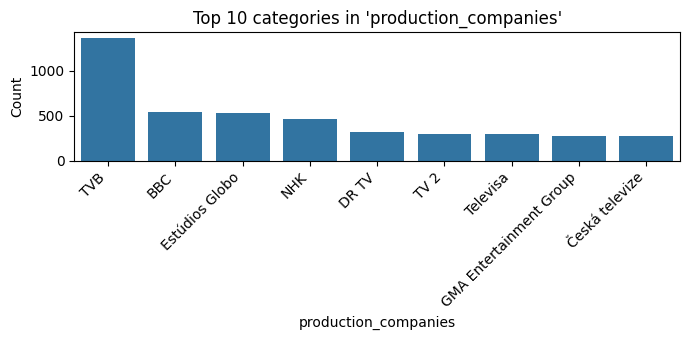


=== Frequency distribution for 'production_countries' ===


,count,percent
production_countries,,
<NA>,91128,54.04
Japan,9682,5.74
United States of America,9315,5.52
China,6167,3.66
Germany,5615,3.33
United Kingdom,5142,3.05
South Korea,3623,2.15
France,2884,1.71
Canada,2841,1.68


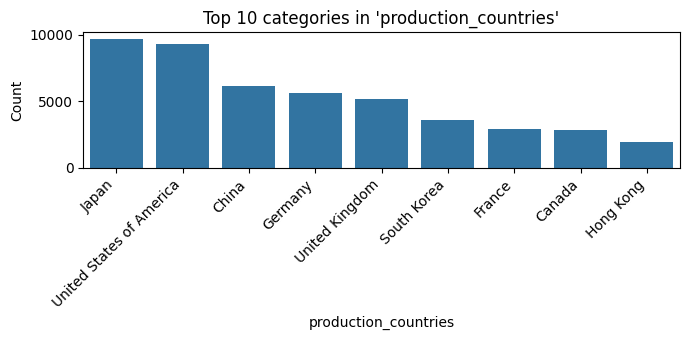


=== Categorical overview (uniques & rare tail) ===


,column,unique,n_< 1%,share_< 1%
7,production_companies,27133,27132,14.99
3,genres,2229,2220,21.02
8,production_countries,1248,1236,14.99
4,languages,1114,1101,11.89
6,spoken_languages,947,934,11.19
5,origin_country,793,774,15.30
0,original_language,106,90,8.43
1,type,7,2,1.18
2,status,6,2,0.53


In [6]:
#--6--

# בדיקת התפלגות קטגוריות (count/%) לכל העמודות הקטגוריאליות שנבחרו + גרף Top-N


# 1) עמודות קטגוריאליות שנבדוק
cat_cols = [
    "original_language", "type", "status", "genres", "languages",
    "origin_country", "spoken_languages", "production_companies", "production_countries"
]

# 2) פרמטרים לתצוגה
TOP_N = 10          # כמות קטגוריות מובילות להצגה
RARE_THRESH_PCT = 1 # סף ראשוני ל"נדיר" (נשתמש מאוחר יותר בצעד ה-Threshold/Other)

# 3) סיכום תדירויות לכל עמודה (טבלה אחודה)
summary_rows = []

for col in cat_cols:
    vc = df[col].value_counts(dropna=False)
    pct = (vc / len(df)) * 100
    freq_tbl = pd.DataFrame({"count": vc, "percent": pct.round(2)})

    print(f"\n=== Frequency distribution for '{col}' ===")
    display(freq_tbl.head(TOP_N))

    # גרף Top-N (ויזואליזציה קלה לפני EDA)
    plt.figure(figsize=(7, 3.5))
    sns.barplot(x=freq_tbl.head(TOP_N).index, y=freq_tbl.head(TOP_N)["count"])
    plt.title(f"Top {TOP_N} categories in '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # אינדיקטור לכמה "זנב ארוך" יש (כמה קטגוריות מתחת לסף)
    n_rare = (freq_tbl["percent"] < RARE_THRESH_PCT).sum()
    rare_share = freq_tbl.loc[freq_tbl["percent"] < RARE_THRESH_PCT, "percent"].sum()

    summary_rows.append({
        "column": col,
        "unique": freq_tbl.shape[0],
        f"n_< {RARE_THRESH_PCT}%": int(n_rare),
        f"share_< {RARE_THRESH_PCT}%": round(rare_share, 2)
    })

# 4) טבלת סיכום כללית לכל העמודות הקטגוריאליות (תועיל להחלטת ה-Threshold)
cat_summary = pd.DataFrame(summary_rows).sort_values("unique", ascending=False)
print("\n=== Categorical overview (uniques & rare tail) ===")
display(cat_summary)


In [7]:
#--7--

# קביעת סף תדירות אחיד לקטגוריות נדירות (ברירת מחדל: 1%)

RARE_THRESH_PCT = 1.0  # סף ראשוני; במידת הצורך נבחן 0.5% לאחר מכן

# עמודות קטגוריאליות שנבחרו (כמו בשלב הקודם)
cat_cols = [
    "original_language", "type", "status", "genres", "languages",
    "origin_country", "spoken_languages", "production_companies", "production_countries"
]

impact_rows = []

for col in cat_cols:
    vc = df[col].value_counts(dropna=False)
    pct = (vc / len(df)) * 100

    # כמה קטגוריות נמצאות מתחת לסף?
    n_rare = (pct < RARE_THRESH_PCT).sum()
    rare_share = pct[pct < RARE_THRESH_PCT].sum()

    # כמה נשאר מעל הסף (קטגוריות מרכזיות)?
    n_major = (pct >= RARE_THRESH_PCT).sum()
    major_share = pct[pct >= RARE_THRESH_PCT].sum()

    impact_rows.append({
        "column": col,
        "unique_total": int(vc.shape[0]),
        "unique_>=thr": int(n_major),
        "coverage_>=thr_%": round(major_share, 2),
        "unique_<thr": int(n_rare),
        "coverage_<thr_%": round(rare_share, 2),
        "threshold_%": RARE_THRESH_PCT
    })

impact_preview = pd.DataFrame(impact_rows).sort_values("unique_total", ascending=False)

print("=== Threshold impact preview (per column) ===")
display(impact_preview)


=== Threshold impact preview (per column) ===


,column,unique_total,unique_>=thr,coverage_>=thr_%,unique_<thr,coverage_<thr_%,threshold_%
7,production_companies,27133,1,64.81,27132,35.19,1.0
3,genres,2229,9,77.16,2220,22.84,1.0
8,production_countries,1248,12,84.12,1236,15.88,1.0
4,languages,1114,12,86.27,1102,13.73,1.0
6,spoken_languages,947,12,87.10,935,12.90,1.0
5,origin_country,793,18,83.09,775,16.91,1.0
0,original_language,106,16,91.55,90,8.45,1.0
1,type,7,5,98.82,2,1.18,1.0
2,status,6,4,99.47,2,0.53,1.0


In [8]:
#--7a--

# מדידת השפעת הסף על קטגוריות לא-חסרות בלבד (NaN מוחרג מהספירה ומהסף)

RARE_THRESH_PCT = 1.0
cat_cols = [
    "original_language","type","status","genres","languages",
    "origin_country","spoken_languages","production_companies","production_countries"
]

impact_rows = []
for col in cat_cols:
    n_nonnull = df[col].notna().sum()
    vc_nonnull = df[col].dropna().value_counts()               # בלי NaN
    pct_nonnull = (vc_nonnull / n_nonnull) * 100

    n_major = (pct_nonnull >= RARE_THRESH_PCT).sum()
    major_share = pct_nonnull[pct_nonnull >= RARE_THRESH_PCT].sum()

    n_rare  = (pct_nonnull < RARE_THRESH_PCT).sum()
    rare_share = pct_nonnull[pct_nonnull < RARE_THRESH_PCT].sum()

    impact_rows.append({
        "column": col,
        "unique_total_nonnull": int(vc_nonnull.shape[0]),
        "unique_>=thr": int(n_major),
        "coverage_>=thr_%(non-null)": round(major_share, 2),
        "unique_<thr": int(n_rare),
        "coverage_<thr_%(non-null)": round(rare_share, 2),
        "nan_share_%": round((1 - n_nonnull/len(df)) * 100, 2),
        "threshold_%": RARE_THRESH_PCT
    })

impact_preview = pd.DataFrame(impact_rows).sort_values("unique_total_nonnull", ascending=False)
display(impact_preview)


,column,unique_total_nonnull,unique_>=thr,coverage_>=thr_%(non-null),unique_<thr,coverage_<thr_%(non-null),nan_share_%,threshold_%
7,production_companies,27132,1,2.29,27131,97.71,64.81,1.0
3,genres,2228,12,65.81,2216,34.19,40.87,1.0
8,production_countries,1247,24,82.47,1223,17.53,54.04,1.0
4,languages,1113,18,87.62,1095,12.38,34.74,1.0
6,spoken_languages,946,18,88.86,928,11.14,35.20,1.0
5,origin_country,792,20,82.85,772,17.15,18.40,1.0
0,original_language,106,16,91.55,90,8.45,0.00,1.0
1,type,7,5,98.82,2,1.18,0.00,1.0
2,status,6,4,99.47,2,0.53,0.00,1.0


In [9]:
#--8--

# Reduce Large Categories: מפה ערכים נדירים ל-"Other" רק בעמודות עם כיסוי גבוה מעל הסף.
# נשארים צמודים למה שנלמד: value_counts + החלטת סף + מיפוי לערך "Other". 

RARE_THRESH_PCT = 1.0

# עמודות שנרצה לצמצם (coverage_>=thr_%(non-null) >= ~80%)
cols_to_reduce = [
    "original_language", "type", "status",
    "production_countries", "languages", "spoken_languages", "origin_country"
]

# עמודות שנדלג עליהן כרגע (רוב הערכים נדירים או NaN רבים מאוד)
cols_skip_for_now = ["production_companies", "genres"]

def reduce_to_other(df, col, thresh_pct=1.0):
    """
    מיפוי לערך "Other" לכל קטגוריה מתחת לסף (על בסיס non-null בלבד).
    NaN נשארים NaN (טיפול חסרים הוא שלב אחר בקו״ל).
    """
    s = df[col]
    n_nonnull = s.notna().sum()
    if n_nonnull == 0:
        print(f"\n[SKIP] '{col}': all values are NaN.")
        return

    vc = s.dropna().value_counts()
    pct = (vc / n_nonnull) * 100
    keep = set(pct[pct >= thresh_pct].index)

    # Before (תצוגה קצרה)
    print(f"\n=== BEFORE '{col}' (Top 10) ===")
    before_tbl = (vc.to_frame("count").assign(percent=(pct).round(2))).head(10)
    print(before_tbl)

    # מיפוי: נשאיר NaN כמו שהוא; ערכים לא-חסרים שמתחת לסף -> "Other"
    df[col] = df[col].where(df[col].isna() | df[col].isin(keep), "Other")

    # After (תצוגה קצרה)
    vc_after = df[col].value_counts(dropna=False)
    pct_after = (vc_after / len(df)) * 100
    print(f"\n=== AFTER '{col}' (threshold={thresh_pct}%) (Top 10) ===")
    after_tbl = (vc_after.to_frame("count")
                 .assign(percent=pct_after.round(2))).head(10)
    print(after_tbl)

# הרצה על העמודות שנבחרו
for c in cols_to_reduce:
    if c in df.columns:
        reduce_to_other(df, c, RARE_THRESH_PCT)

print("\n[INFO] Skipped (by design):", cols_skip_for_now)



=== BEFORE 'original_language' (Top 10) ===
                   count  percent
original_language                
en                 76304    45.25
zh                 14422     8.55
ja                 14048     8.33
ko                  7820     4.64
de                  7712     4.57
fr                  7290     4.32
es                  5602     3.32
pt                  3551     2.11
ru                  2963     1.76
nl                  2923     1.73

=== AFTER 'original_language' (threshold=1.0%) (Top 10) ===
                   count  percent
original_language                
en                 76304    45.25
zh                 14422     8.55
Other              14249     8.45
ja                 14048     8.33
ko                  7820     4.64
de                  7712     4.57
fr                  7290     4.32
es                  5602     3.32
pt                  3551     2.11
ru                  2963     1.76

=== BEFORE 'type' (Top 10) ===
              count  percent
type             

In [10]:
#--9--

# בדיקת תקינות אחרי צמצום קטגוריות (Sanity Check)
check_cols = [
    "original_language", "type", "status",
    "production_countries", "languages", "spoken_languages", "origin_country"
]

for c in check_cols:
    print(f"\n=== '{c}' unique values and counts (Top 10) ===")
    print(df[c].value_counts(dropna=False).head(10))



=== 'original_language' unique values and counts (Top 10) ===
original_language
en       76304
zh       14422
Other    14249
ja       14048
ko        7820
de        7712
fr        7290
es        5602
pt        3551
ru        2963
Name: count, dtype: Int64

=== 'type' unique values and counts (Top 10) ===
type
Scripted       129301
Documentary     13864
Miniseries      10810
Reality          9682
Talk Show        2997
Other            1985
Name: count, dtype: Int64

=== 'status' unique values and counts (Top 10) ===
status
Ended               93232
Returning Series    67507
Canceled             4634
In Production        2380
Other                 886
Name: count, dtype: Int64

=== 'production_countries' unique values and counts (Top 10) ===
production_countries
<NA>                        91128
Other                       13584
Japan                        9682
United States of America     9315
China                        6167
Germany                      5615
United Kingdom          

In [11]:
#--10--

# Cleaning Text (basic) · חל רק על טקסט חופשי. זהירות עם עמודות שאינן טקסט טבעי (URLs/paths/רשימות).

# 1) בחרי אילו עמודות טקסט לנקות:
text_cols = ["overview", "tagline", "name", "original_name"]  # הסירי name/original_name אם חשוב לשמר רישיות

# 2) ניקוי: lowercase + הסרת תווים שאינם אות/ספרה/רווח + ריווח
for col in text_cols:
    if col in df.columns:
        # 1+2: lowercase + remove punctuation/special chars
        df[col] = df[col].str.lower().str.replace(r"[^a-z0-9\s]", " ", regex=True)
        # 3: remove simple English stopwords (סט קטן בלבד)
        stopwords = {"the", "and", "a", "an", "in", "of", "on", "to", "for", "is", "it", "with"}
        df[col] = df[col].apply(lambda x: " ".join(w for w in x.split() if w not in stopwords) if isinstance(x, str) else x)
        # 4: normalize spaces
        df[col] = df[col].str.replace(r"\s+", " ", regex=True).str.strip()

# בדיקה מדגמית
for col in text_cols:
    if col in df.columns:
        print(f"\n=== Sample cleaned '{col}' ===")
        print(df[col].head(3))



=== Sample cleaned 'overview' ===
0    seven noble families fight control mythical la...
1    carry out biggest heist history mysterious man...
2    when young boy vanishes small town uncovers my...
Name: overview, dtype: object

=== Sample cleaned 'tagline' ===
0                 winter coming
1               perfect robbery
2    every ending has beginning
Name: tagline, dtype: object

=== Sample cleaned 'name' ===
0       game thrones
1        money heist
2    stranger things
Name: name, dtype: object

=== Sample cleaned 'original_name' ===
0        game thrones
1    la casa de papel
2     stranger things
Name: original_name, dtype: object


In [12]:
#--11--

# Cleaning Text · חל רק על עמודות טקסט חופשי, לא על קטגוריות או URLים

# עמודות טקסט חופשי בלבד (לא URLs / קטגוריות)
text_cols = ["overview", "tagline", "name", "original_name"]

for col in text_cols:
    if col in df.columns:
        # 1+2) הסרת סימני פיסוק ותווים מיוחדים + המרה לאותיות קטנות
        df[col] = df[col].astype("string").str.lower().str.replace(r"[^a-z0-9\s]", " ", regex=True)

        # 4) שמירה על רווחים עקביים: רווח אחד בין מילים, אין רווחים מיותרים בתחילת/סוף
        df[col] = df[col].str.replace(r"\s+", " ", regex=True).str.strip()

        # הצגה מדגמית
        print(f"\n=== Sample cleaned text from '{col}' ===")
        print(df[col].head(3))



=== Sample cleaned text from 'overview' ===
0    seven noble families fight control mythical la...
1    carry out biggest heist history mysterious man...
2    when young boy vanishes small town uncovers my...
Name: overview, dtype: string

=== Sample cleaned text from 'tagline' ===
0                 winter coming
1               perfect robbery
2    every ending has beginning
Name: tagline, dtype: string

=== Sample cleaned text from 'name' ===
0       game thrones
1        money heist
2    stranger things
Name: name, dtype: string

=== Sample cleaned text from 'original_name' ===
0        game thrones
1    la casa de papel
2     stranger things
Name: original_name, dtype: string


In [13]:
#--12--

# -- 5·Report --
# דוח מסכם קצר אחרי ה-Data Prep: תצוגה נקייה וקריאה

def section(title):
    print("\n" + "="*10 + f" {title} " + "="*10)

# A) סקירה כללית
section("Dataset overview")
print("Shape (rows, cols):", df.shape)

# B) חסרים לפי עמודה (ממויין מהכי חסר)
section("Nulls by column (count & %) — top 15")
nulls = df.isna().sum().sort_values(ascending=False).to_frame("n_null")
nulls["pct_null"] = (nulls["n_null"] / len(df) * 100).round(2)
display(nulls.head(15))

# C) טיפוסים לפי עמודה (קומפקטי)
section("Dtypes by column (compact)")
dtype_tbl = df.dtypes.astype(str).to_frame("dtype")
display(dtype_tbl)

# D) עמודות קטגוריאליות מרכזיות — מספר ערכים ייחודיים
section("Categorical key columns — #uniques")
cat_cols = [
    "original_language", "type", "status",
    "production_countries", "languages", "spoken_languages", "origin_country"
]
existing_cat_cols = [c for c in cat_cols if c in df.columns]
uni = df[existing_cat_cols].nunique().sort_values(ascending=False).to_frame("n_unique")
display(uni)

# E) טופ קטגוריות לכל עמודה קטגוריאלית (10 ראשונות בלבד)
for c in existing_cat_cols:
    section(f"Top values — '{c}' (head 10)")
    top_tbl = df[c].value_counts(dropna=False).head(10).to_frame("count")
    display(top_tbl)

# F) דגימה טקסטואלית קצרה (אחרי ניקוי) — לווידוא שלא "שברנו" טקסט
text_free_cols = [col for col in ["overview", "tagline", "name", "original_name"] if col in df.columns]
if text_free_cols:
    section("Text sample (cleaned) — sanity")
    for col in text_free_cols:
        print(f"\n>>> {col} (3 samples)")
        print(df[col].dropna().head(3).tolist())




========== Dataset overview ==========
Shape (rows, cols): (168639, 29)

========== Nulls by column (count & %) — top 15 ==========


,n_null,pct_null
tagline,163309,96.84
created_by,132143,78.36
homepage,117641,69.76
production_companies,109297,64.81
production_countries,91128,54.04
backdrop_path,90859,53.88
overview,75306,44.66
networks,71050,42.13
genres,68926,40.87
poster_path,59902,35.52



========== Dtypes by column (compact) ==========


,dtype
id,int64
name,string
number_of_seasons,int64
number_of_episodes,int64
original_language,string
vote_count,int64
vote_average,float64
overview,string
adult,bool
backdrop_path,string



========== Categorical key columns — #uniques ==========


,n_unique
production_countries,25
origin_country,21
languages,19
spoken_languages,19
original_language,17
type,6
status,5



========== Top values — 'original_language' (head 10) ==========


,count
original_language,
en,76304
zh,14422
Other,14249
ja,14048
ko,7820
de,7712
fr,7290
es,5602
pt,3551



========== Top values — 'type' (head 10) ==========


,count
type,
Scripted,129301
Documentary,13864
Miniseries,10810
Reality,9682
Talk Show,2997
Other,1985



========== Top values — 'status' (head 10) ==========


,count
status,
Ended,93232
Returning Series,67507
Canceled,4634
In Production,2380
Other,886



========== Top values — 'production_countries' (head 10) ==========


,count
production_countries,
<NA>,91128
Other,13584
Japan,9682
United States of America,9315
China,6167
Germany,5615
United Kingdom,5142
South Korea,3623
France,2884



========== Top values — 'languages' (head 10) ==========


,count
languages,
<NA>,58589
en,38671
Other,13627
ja,11051
zh,7883
de,6204
fr,5745
ko,4520
es,3853



========== Top values — 'spoken_languages' (head 10) ==========


,count
spoken_languages,
<NA>,59359
English,39251
Other,12175
日本語,11053
普通话,7892
Deutsch,6209
Français,5750
한국어/조선말,4522
Español,3861



========== Top values — 'origin_country' (head 10) ==========


,count
origin_country,
<NA>,31030
US,28759
Other,23601
JP,13658
GB,13298
CN,11651
DE,6607
KR,6146
CA,4528



========== Text sample (cleaned) — sanity ==========

>>> overview (3 samples)
['seven noble families fight control mythical land westeros friction between houses leads full scale war all while very ancient evil awakens farthest north amidst war neglected military order misfits night s watch all that stands between realms men icy horrors beyond', 'carry out biggest heist history mysterious man called professor recruits band eight robbers who have single characteristic none them has anything lose five months seclusion memorizing every step every detail every probability culminate eleven days locked up national coinage stamp factory spain surrounded by police forces dozens hostages their power find out whether their suicide wager will lead everything or nothing', 'when young boy vanishes small town uncovers mystery involving secret experiments terrifying supernatural forces one strange little girl']

>>> tagline (3 samples)
['winter coming', 'perfect robbery', 'every ending has beginnin

In [14]:
#--13--

# -- 6 --
# Final Checks · אימותים אחרונים לפני שמירה

def section(title):
    print("\n" + "="*10 + f" {title} " + "="*10)

# 6.1 בדיקה: אין כפילויות בשמות עמודות; בדיקת מפתח יחיד (id)
section("Columns & key integrity")
dupe_cols = df.columns[df.columns.duplicated()].tolist()
print("Duplicate column names:", dupe_cols if dupe_cols else "None")

if "id" in df.columns:
    id_nulls = df["id"].isna().sum()
    id_unique = df["id"].nunique()
    print(f"id nulls: {id_nulls}, unique ids: {id_unique}, rows: {len(df)}")
    print("id is a valid unique key:", id_nulls == 0 and id_unique == len(df))
else:
    print("No 'id' column found to validate as a key.")

# 6.2 בדיקה: חסרים שנוצרו מטיפוסים/תאריכים (סקירה קצרה)
section("Missing values — overview (top 12)")
nulls = df.isna().sum().sort_values(ascending=False).to_frame("n_null")
nulls["pct_null"] = (nulls["n_null"] / len(df) * 100).round(2)
display(nulls.head(12))

# 6.3 בדיקה: קטגוריות אחרי צמצום — היגיון בסיסי (Other/NaN)
section("Categoricals — 'Other' and NaN share")
cat_cols = [
    "original_language", "type", "status",
    "production_countries", "languages", "spoken_languages", "origin_country"
]
summary_rows = []
for c in [col for col in cat_cols if col in df.columns]:
    vc = df[c].value_counts(dropna=False)
    n = len(df)
    other_share = float((vc.get("Other", 0) / n) * 100)
    nan_share = float((vc.get(np.nan, 0) / n) * 100)
    summary_rows.append({
        "column": c,
        "unique_values": int(df[c].nunique(dropna=True)),
        "Other_%": round(other_share, 2),
        "NaN_%": round(nan_share, 2)
    })
cat_check = pd.DataFrame(summary_rows).sort_values("Other_%", ascending=False)
display(cat_check)

# 6.4 בדיקה: טקסט חופשי אחרי ניקוי — אין מחרוזות ריקות מיותרות
section("Text columns — empties & samples")
text_cols = [c for c in ["overview", "tagline", "name", "original_name"] if c in df.columns]
for c in text_cols:
    empty_cnt = df[c].eq("").sum() if pd.api.types.is_string_dtype(df[c]) else 0
    print(f"{c}: empty strings = {empty_cnt}")
    print(f">>> {c} sample:", df[c].dropna().head(2).tolist())

# המרת מחרוזות ריקות ל-NaN בעמודות טקסט חופשי (עקביות חסרים)

text_cols = [c for c in ["overview", "tagline", "name", "original_name"] if c in df.columns]

# לפני (בדיקת ריקים)
for c in text_cols:
    empty_before = (df[c] == "").sum() if pd.api.types.is_string_dtype(df[c]) else 0
    print(f"{c}: empty strings BEFORE = {empty_before}")

# המרה בפועל
for c in text_cols:
    df[c] = df[c].replace("", pd.NA)

# אחרי (ווידוא שהריקים הפכו ל-NaN)
for c in text_cols:
    empty_after = (df[c] == "").sum() if pd.api.types.is_string_dtype(df[c]) else 0
    print(f"{c}: empty strings AFTER  = {empty_after}")
    print(f"{c}: NaN count            = {df[c].isna().sum()}")



========== Columns & key integrity ==========
Duplicate column names: None
id nulls: 0, unique ids: 164705, rows: 168639
id is a valid unique key: False

========== Missing values — overview (top 12) ==========


,n_null,pct_null
tagline,163309,96.84
created_by,132143,78.36
homepage,117641,69.76
production_companies,109297,64.81
production_countries,91128,54.04
backdrop_path,90859,53.88
overview,75306,44.66
networks,71050,42.13
genres,68926,40.87
poster_path,59902,35.52



========== Categoricals — 'Other' and NaN share ==========


,column,unique_values,Other_%,NaN_%
6,origin_country,21,13.99,18.40
0,original_language,17,8.45,0.00
4,languages,19,8.08,34.74
3,production_countries,25,8.06,54.04
5,spoken_languages,19,7.22,35.20
1,type,6,1.18,0.00
2,status,5,0.53,0.00



========== Text columns — empties & samples ==========
overview: empty strings = 40
>>> overview sample: ['seven noble families fight control mythical land westeros friction between houses leads full scale war all while very ancient evil awakens farthest north amidst war neglected military order misfits night s watch all that stands between realms men icy horrors beyond', 'carry out biggest heist history mysterious man called professor recruits band eight robbers who have single characteristic none them has anything lose five months seclusion memorizing every step every detail every probability culminate eleven days locked up national coinage stamp factory spain surrounded by police forces dozens hostages their power find out whether their suicide wager will lead everything or nothing']
tagline: empty strings = 16
>>> tagline sample: ['winter coming', 'perfect robbery']
name: empty strings = 18835
>>> name sample: ['game thrones', 'money heist']
original_name: empty strings = 41977
>>

In [15]:
#--14--

# -- Save clean dataset (Step 6.4) --
# שמירה מפורשת של הגרסה הנקייה להמשך שלבי הפרויקט (EDA/מודל)
# שימי לב: לא לכלול את האינדקס בקובץ הפלט (index=False)

clean_path = "tmdb_tv_clean_v1.csv"  # שם ברור + גרסה
df.to_csv(clean_path, index=False, encoding="utf-8")

print(f"[OK] Clean dataset saved to: {clean_path}")


[OK] Clean dataset saved to: tmdb_tv_clean_v1.csv
